# 讀標註完的

28 28
{'id': '0298', 'mask': [[[0, 0], [0, 33], [32, 33], [33, 32], [34, 32], [32, 30], [32, 28], [31, 27], [31, 24], [30, 23], [30, 14], [34, 10], [35, 10], [36, 9], [37, 9], [38, 8], [37, 7], [37, 6], [34, 3], [34, 1], [33, 0]], [[2, 0], [1, 1], [0, 1], [0, 33], [32, 33], [33, 32], [34, 32], [32, 30], [32, 28], [31, 27], [31, 24], [30, 23], [30, 19], [29, 18], [29, 17], [30, 16], [30, 14], [34, 10], [35, 10], [34, 9], [36, 7], [36, 5], [35, 4], [34, 4], [33, 3], [33, 2], [32, 1], [31, 1], [30, 2], [28, 2], [27, 1], [26, 1], [25, 0]], [[37, 10], [36, 11], [35, 11], [34, 12], [33, 12], [31, 14], [31, 22], [32, 23], [32, 26], [33, 27], [33, 30], [37, 30], [37, 27], [38, 26], [38, 18], [39, 17], [39, 15], [40, 14], [40, 13], [39, 12], [39, 11], [38, 10]], [[41, 14], [41, 15], [40, 16], [40, 19], [39, 20], [39, 33], [48, 33], [48, 30], [47, 29], [47, 20], [48, 19], [48, 18], [50, 16], [51, 16], [52, 15], [52, 14]], [[51, 17], [49, 19], [49, 20], [48, 21], [48, 26], [49, 27], [49, 33], [64

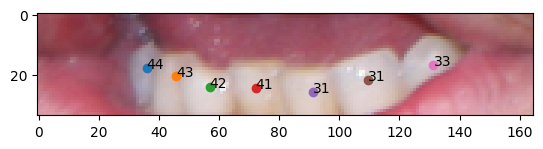

In [1]:
from os import listdir
import json 
from pathlib import Path
import matplotlib.pyplot as plt
import io
import cv2
import numpy as np 
from PIL import Image


Dir_path=Path('./app/TrainData/labeled')
files = listdir(str(Dir_path/'image'))

all_path=[]
all_mask_path=[]
for f in files:
    f=Path(f)
    if f.suffix!='.png':
        print(f)
        continue

    fullpath=Dir_path/'image'/f
    maskpath=Dir_path/'mask'/f'{f.stem}.json'

    all_path.append(str(fullpath.resolve()))
    all_mask_path.append(str(maskpath.resolve()))

    
        
print(len(all_path) ,len(all_mask_path))

all_mask=[]
for path,maskpath in zip(all_path,all_mask_path):
    fig=cv2.imread(path)
    
    with open(maskpath) as f:
        data=json.load(f)
    print(data)
    all_mask.append(data)
    plt.imshow(cv2.cvtColor(fig,cv2.COLOR_RGB2BGR))
    for i in range(len(data['mask'])):
        mask=np.array(data['mask'][i])
        if data['label'][i]!=-1:
            plt.text(np.mean(mask[:,0]), np.mean(mask[:,1]), data['label'][i])
            plt.scatter(np.mean(mask[:,0]), np.mean(mask[:,1]))

    break

# 產生CoCo資料格式

In [6]:
from BuildCoCoDataset import BuildCoCoDataset

BuildCoCoDataset(0.8)

build(./app/TrainData/labeled/train.json,['2023-09-19-14-45-24.png' '2023-09-14-17-14-38.png'
 '2023-09-19-14-35-16.png' '0298.png' '2023-09-19-14-31-39.png'
 '2023-09-19-14-35-44.png' '2023-09-19-14-42-47.png'
 '2023-09-19-14-38-40.png' '2023-09-19-14-39-24.png'
 '2023-09-19-14-37-17.png' '2023-09-19-14-42-01.png'
 '2023-09-19-14-28-53.png' '2023-09-19-14-34-13.png' '0267.png'
 '2023-09-19-14-43-17.png' '0071.png' '2023-09-19-14-32-26.png' '0065.png'
 '0273.png' '0059.png' '2023-09-19-14-31-07.png' '2023-09-19-14-32-41.png'])


## 驗證CoCo

{'name': '2023-09-19-14-38-40.png', 'anns': [[22, 16, 15, 41, 3], [31, 14, 17, 36, 2], [43, 6, 42, 46, 1], [85, 8, 44, 47, 5], [131, 10, 32, 39, 6], [164, 11, 34, 42, 7], [194, 24, 24, 29, 8], [221, 25, 21, 22, 9]]}


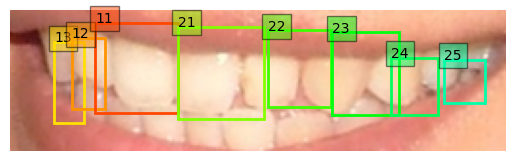

In [7]:
import json
import os
import random as rd
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()


def load_img_ann(ann_path=str(Dir_path/"train.json")):
    """return [{img_name, [ (x, y, h, w, label), ... ]}]"""
    with open(ann_path) as fp:
        root = json.load(fp)
    img_dict = {}
    for img_info in root['images']:
        img_dict[img_info['id']] = {'name': img_info['file_name'], 'anns': []}
    for ann_info in root['annotations']:
        img_dict[ann_info['image_id']]['anns'].append(
            ann_info['bbox'] + [ann_info['category_id']])
        
    cate_dict={}

    for cate in root["categories"]:
        cate_dict[cate["id"]]=cate["name"]

    return img_dict, cate_dict


def show_img_ann(img_info,cate_dict):
    from PIL import Image
    #from dldemos.nms.show_bbox import draw_bbox
    print(img_info)

    """with open(str(Dir_path/"train.json")) as fp:
        root = json.load(fp)
    categories = root['categories']
    category_dict = {int(c['id']): c['name'] for c in categories}
"""
    img_path = Dir_path/"image"/img_info['name']
    img = Image.open(img_path)

    currentAxis = plt.gca()
    currentAxis.axis('off')

    plt.imshow(img)
    for ann in img_info['anns']:
        x, y, w, h, c = ann
        x1, y1, x2, y2 = x, y, x + w, y + h
        #draw_bbox(img, (x1, y1, x2, y2), 1.0, text=category_dict[ann[4]])
        currentAxis.add_patch(plt.Rectangle((x,y),w,h,
                                            fill=False,
                                            edgecolor=colors[c],
                                            linewidth=2))
        currentAxis.text(x, y, cate_dict[c],
                         bbox={'facecolor': colors[c], 'alpha': 0.5})

    #img.save('work_dirs/tmp.jpg')



    plt.show()



img_dict, cate_dict = load_img_ann()
keys = list(img_dict.keys())
show_img_ann(img_dict[rd.choice(keys)],cate_dict)

#

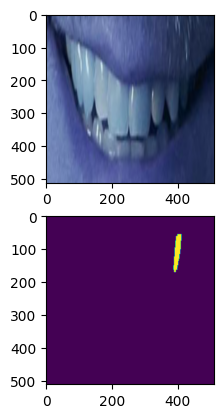

In [8]:
from app.lib.Polygon import Polygon
import matplotlib.pyplot as plt
import numpy as np



def read(ann_path):
    x_data=[]
    y_data=[]
    img_path={}
    with open(ann_path) as fp:
        root = json.load(fp)

    for img in root["images"]:
        img_path[img['id']]=str(Dir_path/"image"/img['file_name'])

    for ann in root["annotations"]:
        mask_pol=Polygon(np.array(ann['segmentation']).reshape(-1,2))
        try:
            img= cv2.imread(img_path[ann['image_id']])
        except:
            print(ann)
            continue
        h,w,d=img.shape
        img=cv2.resize(img,(512,512) )
        plt.subplot(211)
        plt.imshow(img)
        x=np.array(img)
        

        
        mask=np.zeros([h,w], np.uint8)
        try:
            cv2.fillPoly(mask,[mask_pol.points],1)
        except:
            print("can't fill",mask_pol.points)

        mask = Image.fromarray(mask)
        mask= mask.resize((512,512))
        plt.subplot(212)
        plt.imshow(mask)
        mask=np.array(mask)
        mask=np.expand_dims(mask,axis=-1)

        x=np.concatenate((x,mask),axis=2 )



        y_data.append(ann['category_id'])
        x_data.append(x)
    return x_data,y_data


train_path=str(Dir_path/"train.json")
val_path=str(Dir_path/"val.json")

train_x,train_y=read(train_path)
val_x,val_y=read(val_path)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
#from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

with open(train_path) as fp:
        root = json.load(fp)
        num_classes =  len(root['categories'])

img_size = 256
